In [1]:
import pandas as pd
from scipy import stats#, optimize
import math
#import numpy as np
#import statsmodels.api as sm

# Get data

In [2]:
leukemia_big=pd.read_csv(r'https://hastie.su.domains/CASI_files/DATA/leukemia_big.csv')#,sep=' '
leukemia_small=pd.read_csv(r'https://hastie.su.domains/CASI_files/DATA/leukemia_small.csv')#,sep=' '

In [3]:
leukemia_big.shape

(7128, 72)

In [4]:
leukemia_big.head()

,ALL,ALL.1,ALL.2,ALL.3,ALL.4,ALL.5,ALL.6,ALL.7,ALL.8,ALL.9,...,AML.15,AML.16,AML.17,AML.18,AML.19,AML.20,AML.21,AML.22,AML.23,AML.24
0,-1.533622,-0.867610,-0.433172,-1.671903,-1.187689,-1.127234,-1.045409,-0.106917,-1.198796,-1.190899,...,-0.436650,-1.274708,-0.681458,-0.876610,-0.624022,-0.431628,-1.435259,-0.671954,-1.013161,-0.969482
1,-1.235673,-1.275501,-1.184492,-1.596424,-1.335256,-1.113730,-0.800880,-0.745177,-0.849312,-1.190899,...,-0.915483,-1.354363,-0.653559,-1.096250,-1.066594,-1.335256,-1.204586,-0.751457,-0.889592,-1.080988
2,-0.333983,0.375927,-0.459196,-1.422571,-0.797493,-1.362768,-0.671954,-1.175674,0.320813,0.646610,...,-0.736156,-0.022153,-0.037455,-0.567335,-1.100749,-0.552938,-0.948874,-0.231657,-0.742163,-0.779500
3,0.488702,0.444011,0.436264,0.193353,0.235632,-0.360312,0.184941,0.425653,0.333983,0.235270,...,0.083781,0.356562,0.416241,0.533986,0.227505,0.416816,0.408202,0.326556,0.361813,0.298864
4,-1.300893,-1.229660,-1.325882,-1.818329,-1.311206,-1.513975,-1.651624,-1.339555,-0.593132,0.133302,...,-1.547444,-1.264475,-1.512318,-1.469583,-1.283472,-0.977672,-1.090178,-1.545120,-1.174272,-1.443183


starts from 0 so gene 136 is row 135

In [5]:
gene_136=leukemia_big.iloc[135].T.reset_index()

In [6]:
gene_136.shape

(72, 2)

In [7]:
gene_136['disease']=gene_136['index'].str.split('.',expand=True)[0]

# Histograms

<Axes: >

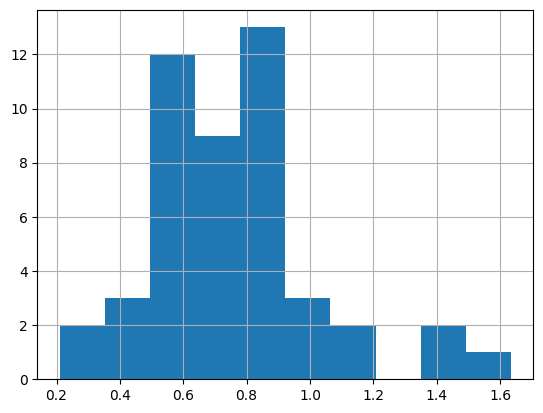

In [8]:
gene_136[gene_136.disease=='ALL'][135].hist()

In [36]:
mu_ALL=gene_136[gene_136.disease=='ALL'][135].mean()
mu_ALL

0.7524793960638297

In [27]:
s_ALL=gene_136[gene_136.disease=='ALL'][135].std()

In [28]:
n_ALL=gene_136[gene_136.disease=='ALL'][135].count()

<Axes: >

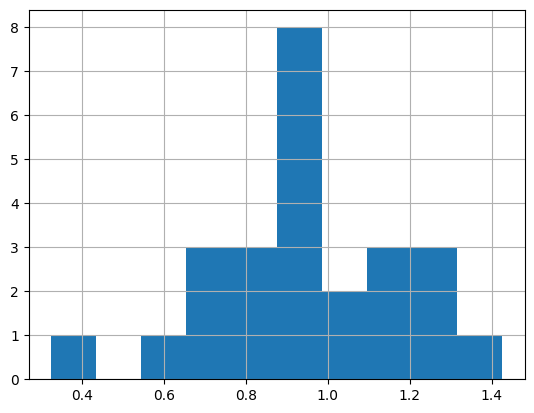

In [10]:
gene_136[gene_136.disease=='AML'][135].hist()

In [37]:
mu_AML=gene_136[gene_136.disease=='AML'][135].mean()
mu_AML

0.94997308076

In [38]:
s_AML=gene_136[gene_136.disease=='AML'][135].std()

In [39]:
n_AML=gene_136[gene_136.disease=='AML'][135].count()

# T test

In [40]:
stats.ttest_ind(gene_136[gene_136.disease=='AML'][135],gene_136[gene_136.disease=='ALL'][135])

TtestResult(statistic=3.0140025758673397, pvalue=0.0035885675237623082, df=70.0)

In [41]:
s_p_2=((s_ALL**2)*(n_ALL-1)+(s_AML**2)*(n_AML-1))/(n_ALL+n_AML-2)

In [42]:
(mu_AML- mu_ALL)/math.sqrt(s_p_2*((1/n_AML)+(1/n_ALL)))

3.0140025758673397

Formula not given in chapter 1 of CASI, therefore I looked it up in Essentials of Business Statistics.